In [1]:
import pandas as pd
from scipy.spatial.distance import cosine
import numpy as np
from scipy.sparse import csr_matrix
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline

# display results to 3 decimal points, not in scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
from simplestatistics import *
# Mean	mean([1, 2, 3])
# Median	median([10, 2, -5, -1])
# Mode	mode([2, 1, 3, 2, 1])
# Geometric mean	geometric_mean([1, 10])
# Harmonic mean	harmonic_mean([1, 2, 4])
# Root mean square	root_mean_square([1, -1, 1, -1])
# Add to mean	add_to_mean(40, 4, (10, 12))
# Skewness	skew([1, 2, 5])
# Kurtosis	kurtosis([1, 2, 3, 4, 5])
# Sample and population variance	variance([1, 2, 3], sample = True)
# Sample and population Standard deviation	standard_deviation([1, 2, 3], sample = True)
# Sample and population Coefficient of variation	coefficient_of_variation([1, 2, 3], sample = True)
# Interquartile range	interquartile_range([1, 3, 5, 7])
# Sum of Nth power deviations	sum_nth_power_deviations([-1, 0, 2, 4], 3)
# Sample and population Standard scores (z-scores)	z_scores([-2, -1, 0, 1, 2], sample = True)
def process_data(accel_data, gyro_data):
    """
    Return raw accel or gyro data in the form of a training sample for prediction
    :param accel: accel data for prediction
    :param gyro: gyro data for prediction
    :return: dataframe with one row ready for prediction via the 'predict' method below.
    """

    df = {}
    for col in ['x', 'y', 'z']:
        accel = list(map(lambda val: val[col], accel_data))
        gyro = list(map(lambda val: val[col], gyro_data))
#         print(accel, len(gyro))
        df['accel-mean-%s' % col] = mean(accel)
        df['accel-median-%s' % col] = median(accel)
#         df['accel-mode-%s' % col] = mode(accel)
#         df['accel-skew-%s' % col] = skew(accel)
#         df['accel-kurt-%s' % col] = kurtosis(accel)
        df['accel-rms-%s' % col] = root_mean_square(accel)
        df['accel-std-%s' % col] = standard_deviation(accel)
#         df['accel-zscore-%s' % col] = z_scores(accel)
        df['accel-min-%s' % col] = min(accel)
        df['accel-max-%s' % col] = max(accel)

        df['gyro-mean-%s' % col] = mean(gyro)
        df['gyro-median-%s' % col] = median(gyro)
#         df['gyro-mode-%s' % col] = mode(gyro)
#         df['gyro-skew-%s' % col] = skew(gyro)
#         df['gyro-kurt-%s' % col] = kurtosis(gyro)
        df['gyro-rms-%s' % col] = root_mean_square(gyro)
        df['gyro-std-%s' % col] = standard_deviation(gyro)
#         df['gyro-zscore-%s' % col] = z_scores(gyro)
        df['gyro-min-%s' % col] = min(gyro)
        df['gyro-max-%s' % col] = max(gyro)

#     return pd.Series(df).to_frame()
    return df

def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

def split_file(file_name, num_files=10):
    with open(file_name, 'r') as handle:
        features = handle.readlines()
        return chunkIt(features, num_files)

In [3]:
calm_accel = []
import os
from decimal import Decimal
res = []
for file_type in ['calm', 'stim']:
#     with open('./data/accel_data_%s.txt' % file_type) as handle:
#         features = handle.readlines()
#         features = list(map(lambda x: x.strip().split()[:-1], features))
#         calm_accel = list(map(lambda x: {'x': float(x[0]), 'y': float(x[1]), 'z': float(x[2])}, features))
#     calm_gyro = []
#     with open('./data/gyro_data_%s.txt' % file_type) as handle:
#         features = handle.readlines()
#         features = list(map(lambda x: x.strip().split()[:-1], features))
#         calm_gyro = list(map(lambda x: {'x': float(x[0]), 'y': float(x[1]), 'z': float(x[2])}, features))
#     # print(calm_accel, calm_gyro)
#     df = process_data(calm_accel, calm_gyro)
#     print(df)
    num_files = 20
    accel_sets = split_file('./data/accel_data_%s.txt' % file_type, num_files)
    gyro_sets = split_file('./data/gyro_data_%s.txt' % file_type, num_files)
    for i in range(num_files):
        accel = accel_sets[i]
        gyro = gyro_sets[i]
        accel = list(map(lambda x: x.strip().split()[:-1], accel))
        accel = list(map(lambda x: {'x': float(x[0]), 'y': float(x[1]), 'z': float(x[2])}, accel))
        gyro = list(map(lambda x: x.strip().split()[:-1], gyro))
        gyro = list(map(lambda x: {'x': float(x[0]), 'y': float(x[1]), 'z': float(x[2])}, gyro))
#         print(accel, gyro)
        d = process_data(accel, gyro)
        d['label'] = file_type == 'stim'
        res.append(d)

    
df = pd.DataFrame.from_dict(res)
print(df.columns.values, df.shape)

['accel-max-x' 'accel-max-y' 'accel-max-z' 'accel-mean-x' 'accel-mean-y'
 'accel-mean-z' 'accel-median-x' 'accel-median-y' 'accel-median-z'
 'accel-min-x' 'accel-min-y' 'accel-min-z' 'accel-rms-x' 'accel-rms-y'
 'accel-rms-z' 'accel-std-x' 'accel-std-y' 'accel-std-z' 'gyro-max-x'
 'gyro-max-y' 'gyro-max-z' 'gyro-mean-x' 'gyro-mean-y' 'gyro-mean-z'
 'gyro-median-x' 'gyro-median-y' 'gyro-median-z' 'gyro-min-x' 'gyro-min-y'
 'gyro-min-z' 'gyro-rms-x' 'gyro-rms-y' 'gyro-rms-z' 'gyro-std-x'
 'gyro-std-y' 'gyro-std-z' 'label'] (40, 37)


In [4]:
def ok_col(col):
    ok_words = ['Mean', 'Min', 'Max', 'STD']
    bad_words = ['Jerk']
    return any(word in col for word in ok_words) and not any(word in col for word in bad_words)

In [5]:
# with open('/Users/cbuonocore/Downloads/HAPT Data Set/features.txt') as handle:
#     features = handle.readlines()
#     features = list(map(lambda x: x.strip(), features))

In [6]:
# with open('/Users/cbuonocore/Downloads/HAPT Data Set/activity_labels.txt') as handle:
#     activity_labels = handle.readlines()
#     activity_labels = list(map(lambda x: x.strip(), activity_labels))


In [7]:
# activity_df = pd.DataFrame(activity_labels)
# activity_df = pd.DataFrame(activity_df[0].str.split(' ').tolist(),
#                            columns = ['activity_id', 'activity_label'])
# activity_df
activity_dict = {
    0: 'NOT_STIMMING',
    1: 'STIMMING'
}
activity_df = pd.Series(activity_dict).to_frame()
activity_df

,0
0,NOT_STIMMING
1,STIMMING


In [8]:
x_train = df.drop('label', axis=1)
y_train = df['label']

In [9]:
# x_train = pd.read_table('/Users/cbuonocore/Downloads/HAPT Data Set/Train/X_train.txt',
#              header = None, sep = " ", names = features)
# cols = x_train.columns.values


# ok_cols = [ 'tBodyGyro-Mean-1', 'tBodyGyro-Mean-2', 'tBodyGyro-Mean-3', 'tBodyGyro-STD-1',
#  'tBodyGyro-STD-2' ,'tBodyGyro-STD-3', 'tBodyGyro-Max-1', 'tBodyGyro-Max-2',
#  'tBodyGyro-Max-3', 'tBodyGyro-Min-1', 'tBodyGyro-Min-2', 'tBodyGyro-Min-3','tBodyAcc-Mean-1',
#            'tBodyAcc-Mean-2', 'tBodyAcc-Mean-3', 'tBodyAcc-STD-1',
#  'tBodyAcc-STD-2', 'tBodyAcc-STD-3', 'tBodyAcc-Max-1', 'tBodyAcc-Max-2',
#  'tBodyAcc-Max-3', 'tBodyAcc-Min-1', 'tBodyAcc-Min-2', 'tBodyAcc-Min-3']
# ok_cols = list(filter(ok_col, cols))
# x_train = x_train[ok_cols]


x_train.head()
print(len(x_train.columns.values))
print(x_train.columns.values)

36
['accel-max-x' 'accel-max-y' 'accel-max-z' 'accel-mean-x' 'accel-mean-y'
 'accel-mean-z' 'accel-median-x' 'accel-median-y' 'accel-median-z'
 'accel-min-x' 'accel-min-y' 'accel-min-z' 'accel-rms-x' 'accel-rms-y'
 'accel-rms-z' 'accel-std-x' 'accel-std-y' 'accel-std-z' 'gyro-max-x'
 'gyro-max-y' 'gyro-max-z' 'gyro-mean-x' 'gyro-mean-y' 'gyro-mean-z'
 'gyro-median-x' 'gyro-median-y' 'gyro-median-z' 'gyro-min-x' 'gyro-min-y'
 'gyro-min-z' 'gyro-rms-x' 'gyro-rms-y' 'gyro-rms-z' 'gyro-std-x'
 'gyro-std-y' 'gyro-std-z']


In [10]:
# y_train = pd.read_table('/Users/cbuonocore/Downloads/HAPT Data Set/Train/y_train.txt',
#              header = None, sep = " ", names = ['activity_id'])
# y_train.head()

In [11]:
# x_test = pd.read_table('/Users/cbuonocore/Downloads/HAPT Data Set/Test/X_test.txt',
#              header = None, sep = " ", names = features)
# x_test.iloc[:10, :10].head()

In [12]:
# y_test = pd.read_table('/Users/cbuonocore/Downloads/HAPT Data Set/Test/y_test.txt',
#              header = None, sep = " ", names = ['activity_id'])
# y_test.head()

# Building a Human Activity Classifier

Now that we've got the train and test data loaded into memory, we can start building a model to predict the activity from the acceleration and angular velocity features.

Let's build a model and plot the cross-validation accuracy curves for the training data. We'll split `x_train` and `y_train` into training and validation sets since we only want to predict on the test set once. We'll use 5-fold cross validation to get a good sense of the model's accuracy at different values of C. To plot the curves, we'll use the `validation_curve` function from sklearn.

In [13]:
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
from sklearn.learning_curve import validation_curve

C_params = np.logspace(-6, 3, 10)
svc_2 = LinearSVC(random_state = 12)

train_scores, test_scores = validation_curve(
    svc_2, x_train.values, y_train.values.flatten(),
    param_name="C", param_range=C_params,
    cv=5, scoring="accuracy", n_jobs=-1)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  Dep

In [14]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [15]:
import seaborn as sns

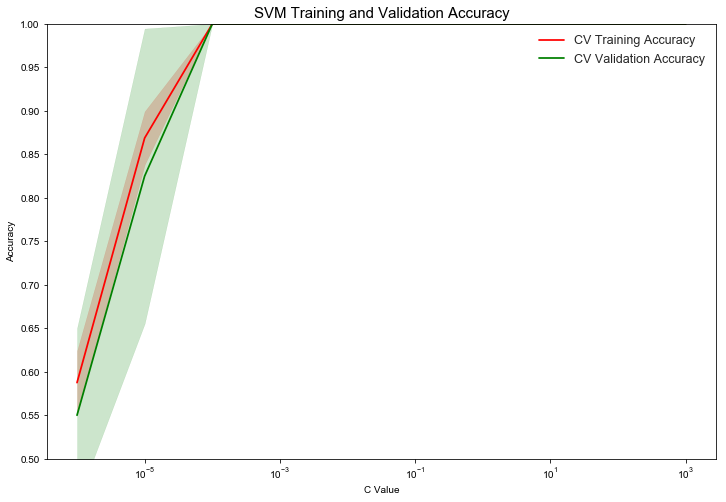

In [16]:
y_min = 0.5
y_max = 1.0

f = plt.figure(figsize = (12, 8))
ax = plt.axes()
sns.set(font_scale = 1.25)
sns.set_style("darkgrid")
plt.title("SVM Training and Validation Accuracy")
plt.xlabel("C Value")
plt.ylabel("Accuracy")
plt.ylim(y_min, y_max)
plt.yticks(np.arange(y_min, y_max + .01, .05))
plt.semilogx(C_params, train_scores_mean, label="CV Training Accuracy", color="red")
plt.fill_between(C_params, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="red")
plt.semilogx(C_params, test_scores_mean, label="CV Validation Accuracy",
             color="green")
plt.fill_between(C_params, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="green")
plt.legend(loc="best")
plt.show()

From the graph, it looks like the best value of C is at 10<sup>-1</sup>. The validation accuracy begins slowly decreasing after that 10<sup>-1</sup>, indicating we are overfitting. The validation curve looks great, but we only optimized on C. We don't have to use a linear kernel. We could do a grid search on different kernels and C values. With a larger search space, we might get a different set of optimal parameters.

Let's run a parameter grid search to see what the optimal parameters are for the SVM model. We'll switch to the general Support Vector Classifier in `sklearn` so we can have the option to try non-linear kernels.

In [17]:
from sklearn.svm import SVC

Cs = np.logspace(-6, 3, 10)
parameters = [{'kernel': ['rbf'], 'C': Cs},
              {'kernel': ['linear'], 'C': Cs}]

svc = SVC(random_state = 12)

clf = GridSearchCV(estimator = svc, param_grid = parameters, cv = 5, n_jobs = -1)
clf.fit(x_train.values, y_train.values.flatten())

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=12, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'C': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03])}, {'kernel': ['linear'], 'C': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03])}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [18]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

SVC(C=1e-06, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=12, shrinking=True,
  tol=0.001, verbose=False)
{'C': 1e-06, 'kernel': 'linear'}
1.0


In [20]:
# Save the model
from sklearn.externals import joblib
joblib.dump(clf, './stim_clf.pkl')

['./stim_clf.pkl']

So the best cross-validated parameters are a `rbf` kernel with `C = 1000`. Let's use the best model to predict on the test data.

In [22]:
clf.score(x_test, y_test)

NameError: name 'x_test' is not defined

94% accuracy. That seems pretty high. But how do know how good that actually is?

# Evaluating the Model

How much better is it than the no-information rate? The no-information rate is the accuracy we'd get if we guessed the most common class for every observation. It's the best we could do with no features.

In [ ]:
y_test.activity_id.value_counts().values[0] / y_test.activity_id.value_counts().values.sum()

Our model's accuracy of 94% looks even better compared to the baseline of 18%. That's over five times more accurate than the no-information accuracy. But where does our model fail? Let's look at the crosstab.

In [ ]:
crosstab = pd.crosstab(y_test.values.flatten(), clf.predict(x_test),
                          rownames=['True'], colnames=['Predicted'],
                          margins=True)
crosstab

We do really well for `activity_ids` 1-3, 5-6, and 8, but much worse for 4, 7 and 9-12. Why is that?

One possible answer is that we don't have enough data. The `All` column on the right side of the crosstab bears that out. We have way fewer observations for activities 7-12.

Additionally, it's clear the model seems to be systematically mistaking some activities for others (activities 4 and 5, 9 and 11, and 10 and 12 are confused for each other more than others). Maybe there's a reason for this. Let's put the labels on the `activity_ids` and see if we notice any patterns.

I'll also convert the crosstab to percentages to make it a bit easier to interpret.

In [ ]:
#percentages_crosstab = crosstab.iloc[:-1, :-1].apply(lambda x: x/x.sum(), axis = 1)
percentages_crosstab = crosstab.iloc[:-1, :-1]
percentages_crosstab.columns = activity_df.activity_label.values
percentages_crosstab.index = activity_df.activity_label.values
percentages_crosstab

That makes it way more clear. The model struggles to classify those `activity_ids` because they are similar actions. 4 and 5 are both stationary (sitting and standing), 9 and 11 both involving lying down (sit-to-lie and stand-to-lie), and 10 and 12 both involve standing up from a resting position (lie-to-sit and lie_to_stand). It makes sense that accelerometer data on these actions would be similar.

So with 94% accuracy in this activity classifier scenario, can we start a Fitbit competitor? Maybe.

We don't necessarily need to distinguish between the 12 different activities themselves, only whether we should count it as walking. If we can predict whether someone is walking or not from the accelerometer with near perfect accuracy, we'd be in business.

## Predicting Walking vs. Not Walking

So how do we classify walking? First we need to convert the labels to a binary to indicate whether they represent walking or staying in place. From the activity labels, we know that 1-3 are walking and everything other activity involves staying in place.

In [ ]:
y_train['walking_flag'] = y_train.activity_id.apply(lambda x: 1 if x <= 3 else 0)
y_test['walking_flag'] = y_test.activity_id.apply(lambda x: 1 if x <= 3 else 0)

Now, we'll train a new SVM model and find the optimal parameters with cross-validation.

In [ ]:
from sklearn.svm import SVC

Cs = np.logspace(-6, 3, 10)
parameters = [{'kernel': ['rbf'], 'C': Cs},
              {'kernel': ['linear'], 'C': Cs}]

svc = SVC(random_state = 12)

clf_binary = GridSearchCV(estimator = svc, param_grid = parameters, cv = 5, n_jobs = -1)
clf_binary.fit(x_train.values, y_train.walking_flag.values.flatten())

In [ ]:
print clf_binary.best_estimator_
print clf_binary.best_params_
print clf_binary.best_score_

In [ ]:
clf_binary.score(x_test, y_test.walking_flag)

99.9% accuracy! Let's look at the crosstab.

In [ ]:
crosstab_binary = pd.crosstab(y_test.walking_flag.values.flatten(), clf_binary.predict(x_test),
                          rownames=['True'], colnames=['Predicted'],
                          margins=True)
crosstab_binary

That's beautiful! We can almost perfectly distinguish walking from staying in place from smartphone accelerometer data. Now we just need to measure the distance traveled and we're ready to compete with Fitbit.